In [270]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [271]:
df = pd.read_csv("C:\\Users\\User\\Desktop\\churnemod\\archive\\churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [273]:
df = df.drop('customerID',axis ='columns')

In [274]:
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [275]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [276]:
df  = df[df['TotalCharges'] != " "]

In [277]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [279]:
df.shape

(7032, 20)

In [280]:
def unq(df):
    for col in  df:
        print(f'{col}: {df[col].unique()}')

In [281]:
unq(df)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [282]:
df.replace('No phone service','No',inplace = True)
df.replace('No internet service','No',inplace = True)

In [283]:
unq(df)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [284]:
df['gender'].replace({'Male':1,'Female':0},inplace = True)

In [285]:
unq(df)

gender: [0 1]
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [286]:
cols = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in cols:
  df[col].replace({'Yes':1,'No':0},inplace=True)

In [287]:
unq(df)

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [288]:
df = pd.get_dummies(df,columns = ['InternetService','Contract','PaymentMethod'])

In [289]:
unq(df)

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_DSL: [ True False]
InternetService_Fiber optic: [False  True]
InternetService_No: [False  True]
Contract_Month-to-month: [ True False]
Contract_One year: [False  True]
Contract_Two year: [False  True]
PaymentMethod_Bank transfer (automatic): [False  True]
PaymentMethod_Credit card (automatic): [False  True]
PaymentMethod_Electronic check: [ True False]
Pa

In [290]:
df = pd.get_dummies(df.astype(int))

In [291]:
unq(df)

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [ 29  56  53  42  70  99  89 104  49  18 100 103 105 113  20 106  55  90
  39  19  59  30  64  96  95  66  45  69  74  97  79  76  84  80 108  24
 107  54  94  75  78 111 110  25  50  62  33  82  21  98  57  91  31  85
  88  23  58  35  44  71 101  68  86  73  81  51 109 112 102  46  93  65
  48  40  83 115 114  41  61  60  67  72  87  92 116  43  28  63  47  34
  26  52  77  36  38 118 117  22  37]
TotalCharges: [  29 1889  108 ... 1990 7362 6844]
Churn: [0 1]
InternetService_DSL: [1 0]
Int

In [292]:
df1= df.drop("Churn" , axis = 'columns')

<Axes: title={'center': 'Correlation with Churn'}>

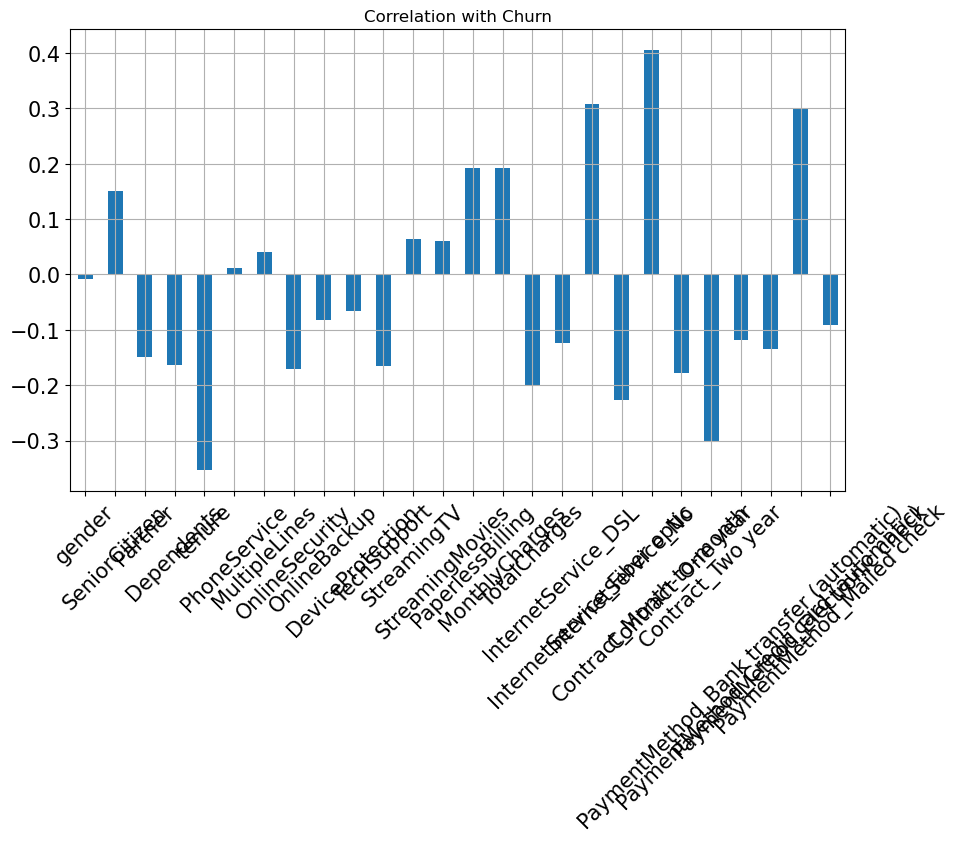

In [293]:
df1.corrwith(df.Churn).plot.bar(figsize=(10,6), title='Correlation with Churn', fontsize=15, rot=45, grid=True)

<Axes: xlabel='Churn', ylabel='count'>

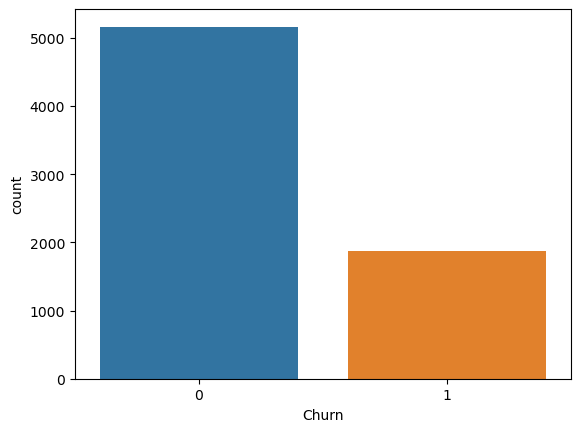

In [294]:
sns.countplot(x = 'Churn',data = df)

In [295]:
scl = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[scl]= scaler.fit_transform(df[scl])

In [296]:
X = df.drop('Churn', axis = 'columns')
y = df['Churn']

In [297]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [298]:
X_train.shape

(5625, 26)

In [299]:
X_test.shape

(1407, 26)

In [300]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train= sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [301]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2543,1,0,0,0,0.169014,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1347,1,0,0,0,0.253521,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2292,0,0,1,1,0.746479,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
6989,0,0,1,1,0.267606,1,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0
5472,1,0,1,1,0.323944,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,1,0,1,1,0.056338,1,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3721,0,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
6378,1,0,1,1,0.169014,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
3558,1,0,1,1,0.380282,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [302]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
352,0,1,0,0,0.084507,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1544,1,0,1,0,0.408451,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
931,1,0,0,0,0.450704,1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
2235,0,0,1,1,0.563380,1,1,1,1,1,...,1,0,0,0,1,0,0,1,0,0
3359,1,0,0,0,0.281690,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0,0,1,0,0.563380,1,0,0,1,1,...,0,1,0,0,1,0,1,0,0,0
5368,0,1,0,0,0.028169,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1062,0,0,1,0,0.464789,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2671,1,0,0,0,0.873239,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [303]:
 ##model evaluaton 
##Logistic Regression


In [304]:
from sklearn.linear_model import LogisticRegression
lrc =  LogisticRegression()
lrc.fit(X_train,y_train)

LogisticRegression()

In [305]:
y_pred= lrc.predict(X_test)

In [306]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
acc= accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)

In [307]:
res=pd.DataFrame([['Logistic Regression',acc,rec,prec,f1]],columns =['Model','Accuracy','Recall','Precision','F1-score'])
res

,Model,Accuracy,Recall,Precision,F1-score
0,Logistic Regression,0.800284,0.563158,0.650456,0.603667


In [308]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[912, 115],
       [166, 214]], dtype=int64)

In [309]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lrc,X_train,y_train,cv=10)

print("Accuracy is  {:.2f} %".format(accuracies.mean()*100))
print("Std is  {:.2f} %".format(accuracies.std()*100))

Accuracy is  80.60 %
Std is  1.59 %


In [310]:
##Random Forest

In [311]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [312]:
y_pred = rfc.predict(X_test)

In [313]:
acc= accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)

In [314]:
forest = pd.DataFrame([['Random Forest',acc,rec,prec,f1]],columns =['Model','Accuracy','Recall','Precision','F1-score'])
forest

,Model,Accuracy,Recall,Precision,F1-score
0,Random Forest,0.769723,0.510526,0.584337,0.544944


In [315]:
res = pd.concat([res,forest],ignore_index = True)

In [316]:
res

,Model,Accuracy,Recall,Precision,F1-score
0,Logistic Regression,0.800284,0.563158,0.650456,0.603667
1,Random Forest,0.769723,0.510526,0.584337,0.544944


In [317]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[889, 138],
       [186, 194]], dtype=int64)

In [318]:
accuracies = cross_val_score(rfc,X_train,y_train,cv=10)

print("Accuracy is  {:.2f} %".format(accuracies.mean()*100))
print("Std is  {:.2f} %".format(accuracies.std()*100))

Accuracy is  78.79 %
Std is  1.40 %


In [319]:
##XGBoost

In [320]:
#pip install xgboost

In [321]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [322]:
y_pred = xgbc.predict(X_test)

In [323]:
acc= accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)

In [324]:
xgb =  pd.DataFrame([['XGBoost',acc,rec,prec,f1]],columns =['Model','Accuracy','Recall','Precision','F1-score'])
res  = pd.concat([res,xgb],ignore_index =True)
res

,Model,Accuracy,Recall,Precision,F1-score
0,Logistic Regression,0.800284,0.563158,0.650456,0.603667
1,Random Forest,0.769723,0.510526,0.584337,0.544944
2,XGBoost,0.770434,0.536842,0.581197,0.558140


In [325]:
cm = confusion_matrix(y_test,y_pred)
cm


array([[880, 147],
       [176, 204]], dtype=int64)

In [326]:
accuracies = cross_val_score(xgbc,X_train,y_train,cv=10)

print("Accuracy is  {:.2f} %".format(accuracies.mean()*100))
print("Std is  {:.2f} %".format(accuracies.std()*100))

Accuracy is  78.74 %
Std is  1.75 %


In [327]:
##Hyper parameter tuning for XGBClassifier

In [328]:
from sklearn.model_selection import RandomizedSearchCV

In [329]:
parameters = {
    'learning_rate' :[0.05,0.1,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,7,8,10,12,15],
    'min_child_weight' :[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
}

In [330]:
randomized_search = RandomizedSearchCV(xgbc,parameters,n_iter = 5,scoring = 'roc_auc',n_jobs=-1,cv=5,verbose=3)


In [331]:
randomized_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [332]:
randomized_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [333]:
randomized_search.best_params_

{'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.3}

In [334]:
randomized_search.best_score_

0.8441491588028681

In [335]:
##Final Model(XGBClassifier)

In [336]:
classifier = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=3,monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None)

In [337]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [338]:
y_pred  = classifier.predict(X_test)

In [339]:
acc= accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)

In [340]:
final = pd.DataFrame([['Final XGBoost',acc,rec,prec,f1]],columns =['Model','Accuracy','Recall','Precision','F1-score'])
res  = pd.concat([res,final],ignore_index =True)
res

,Model,Accuracy,Recall,Precision,F1-score
0,Logistic Regression,0.800284,0.563158,0.650456,0.603667
1,Random Forest,0.769723,0.510526,0.584337,0.544944
2,XGBoost,0.770434,0.536842,0.581197,0.558140
3,Final XGBoost,0.803838,0.542105,0.668831,0.598837


In [341]:
cm=   confusion_matrix(y_test,y_pred)
cm

array([[925, 102],
       [174, 206]], dtype=int64)

In [342]:
accuracies = cross_val_score(classifier,X_train,y_train,cv=10)

print("Accuracy is  {:.2f} %".format(accuracies.mean()*100))
print("Std is  {:.2f} %".format(accuracies.std()*100))

Accuracy is  79.84 %
Std is  1.39 %


In [343]:
##Predictions

In [344]:
y_test[:20]

352     0
1544    0
931     0
2235    0
3359    0
4157    0
6945    1
4241    1
4756    0
6836    1
6659    0
3655    0
6587    0
2794    0
4417    1
4528    0
2087    1
4016    0
5406    0
2319    0
Name: Churn, dtype: int32

In [345]:
xgb = classifier.predict(X_test)
xgb[:20]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [346]:
rf = rfc.predict(X_test)
rf[:20]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [347]:
lr = lrc.predict(X_test)
lr[:20]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1])